In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [135]:
Nx = 10
Nt = 5
hx = 1/(Nx+1)
ht = 0.01
tf = 2
a = 1
rho = a*ht/hx

## Boundary conditions
left_x = 0
right_x = 1


xs = [0]
for i in range(Nx):
    xs.append(xs[-1] + hx)

ts = [0]
while ts[-1] < tf:
    ts.append(ts[-1] + ht)

Us = [[]]

## setting initial condition on t = 0
for x in xs:
    if (x < 0.5):
        newU = 0
    else:
        newU = 1
    Us[-1].append(newU)
        
        
## solving for t+1

for t in ts[:-1]:
    U = []
    for x in range(1,len(xs)+1):   
        if x-1 == 0:
            newU = Us[-1][x] - rho/2 * (Us[-1][x+1] - left_x)
        elif x+1 == Nx+1:
            newU = Us[-1][x] - rho/2 * (right_x - Us[-1][x-1])
        else:
            #print(str(x) + ' - ' + str(Us[-1][x]))
            newU = Us[-1][x] - rho/2 * (Us[-1][x+1] - Us[-1][x-1])
        U.append(newU)
    Us.append(U)

IndexError: list index out of range

In [148]:
def m_Tnew(n, i, Ts):
    if i-1 == 0:
        newT = Ts[i] -rho/2 * (Ts[i+1] - left_x)
    elif i+1 == N+1:
        newT = Ts[i] -rho/2 * (right_x - Ts[i-1])
    else:
        newT = Ts[i] -rho/2 * (Ts[i+1]- Ts[i-1])
    return newT

N = 5
h = 1/(N+1)
dt = 0.1*h**2
tf = 20
ts = np.linspace(0,tf,N+2) # grid de tempo
xs = np.arange(0,1.1,h)
Ts = np.zeros((tf,N+2))  # Matriz de resultados
k = 1
for (x,i) in zip(xs,range(1,N+1)):
    if (i < 0.5):
        Ts[0][i] = 0
    else:
        Ts[0][i] = 1
            
for n in range(0,tf-1):
    for i in range(1,N+1):
            Ts[n+1][i] = m_Tnew(n, i, Ts[n])

In [149]:
Ts

array([[0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.        ],
       [0.        , 0.945     , 1.        , 1.        , 1.        ,
        1.        , 0.        ],
       [0.        , 0.89      , 0.996975  , 1.        , 1.        ,
        1.        , 0.        ],
       [0.        , 0.83516637, 0.990925  , 0.99983362, 1.        ,
        1.        , 0.        ],
       [0.        , 0.7806655 , 0.9818683 , 0.9993345 , 0.99999085,
        1.        , 0.        ],
       [0.        , 0.72666274, 0.96984151, 0.99833776, 0.99995425,
        0.9999995 , 0.        ],
       [0.        , 0.67332146, 0.95489938, 0.99668156, 0.99986285,
        0.99999698, 0.        ],
       [0.        , 0.62080199, 0.93711457, 0.99420857, 0.9996805 ,
        0.99998944, 0.        ],
       [0.        , 0.56926069, 0.91657721, 0.99076744, 0.99936256,
        0.99997186, 0.        ],
       [0.        , 0.51884895, 0.89339434, 0.98621425, 0.99885631,
        0.99993681, 0. 

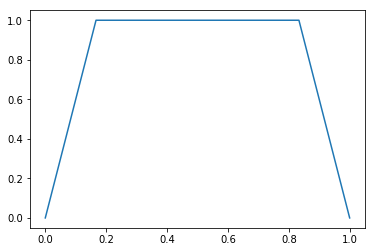

In [141]:
for i in range(len(Us)):
    plt.plot(xs,Ts[i])
plt.show()

In [129]:
ts

[0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.060000000000000005,
 0.07,
 0.08,
 0.09,
 0.09999999999999999,
 0.10999999999999999,
 0.11999999999999998,
 0.12999999999999998,
 0.13999999999999999,
 0.15,
 0.16,
 0.17,
 0.18000000000000002,
 0.19000000000000003,
 0.20000000000000004,
 0.21000000000000005,
 0.22000000000000006,
 0.23000000000000007,
 0.24000000000000007,
 0.25000000000000006,
 0.26000000000000006,
 0.2700000000000001,
 0.2800000000000001,
 0.2900000000000001,
 0.3000000000000001,
 0.3100000000000001,
 0.3200000000000001,
 0.3300000000000001,
 0.34000000000000014,
 0.35000000000000014,
 0.36000000000000015,
 0.37000000000000016,
 0.38000000000000017,
 0.3900000000000002,
 0.4000000000000002,
 0.4100000000000002,
 0.4200000000000002,
 0.4300000000000002,
 0.4400000000000002,
 0.45000000000000023,
 0.46000000000000024,
 0.47000000000000025,
 0.48000000000000026,
 0.49000000000000027,
 0.5000000000000002,
 0.5100000000000002,
 0.5200000000000002,
 0.5300000000000002,
 0.54000000

In [130]:
Us

[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [0.055, 0.0, 0.0, 0.0, -0.055, 0.945, 1.0, 1.0, 1.0, 1.055, 1.055],
 [0.055,
  0.0,
  0.003025,
  -0.106975,
  0.886975,
  0.996975,
  1.0,
  0.9969750000000001,
  1.0519749999999999,
  1.113025,
  1.113025],
 [0.054833625,
  0.008908625,
  -0.15559225,
  0.8262577499999999,
  0.9907586249999999,
  1.0,
  0.994116375,
  1.04559225,
  1.10966725,
  1.174241375,
  1.174241375],
 [0.07246619875,
  -0.20054645187499998,
  0.7632084518749999,
  0.9812028012499999,
  0.99981532375,
  0.9916088012500001,
  1.039236951875,
  1.102591548125,
  1.170689798125,
  1.238824650625,
  1.238824650625],
 [-0.18752291672812496,
  0.6982122429531249,
  0.968189423296875,
  0.99924299375,
  0.989440611703125,
  1.033132900796875,
  1.09536164158125,
  1.1631969774875,
  1.2350772337375,
  1.306960006409375,
  1.306960006409375],
 [0.6999618246717968,
  0.9516327320030469,
  0.9980741783876563,
  0.9875766668155469,
  1.0273072441535782,
  1.0882081173632656,
  1.155512